<a href="https://colab.research.google.com/github/kundajelab/mfinkels_work/blob/master/av/EvaluateModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/test_simulation.simdata.gz -O 
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_orig_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_taloff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_gataoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_bothoff_seqs.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/shuff_toanalyze_orig_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/shuff_toanalyze_taloff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/shuff_toanalyze_gataoff_seqs.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/shuff_toanalyze_bothoff_seqs.txt.gz

!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/toanalyze_orig_pos_labels.txt.gz

wget: option requires an argument -- 'O'
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2020-05-19 04:27:48--  https://github.com/kundajelab/mfinkels_work/raw/8d5a819/av/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/mfinkels_work/8d5a81927f410e4c9472fe8c7a2859a4af029670/av/data/test_neg_labels.txt.gz [following]
--2020-05-19 04:27:48--  https://raw.githubusercontent.com/kundajelab/mfinkels_work/8d5a81927f410e4c9472fe8c7a2859a4af029670/av/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52345

In [0]:
!gunzip -f *.gz

In [4]:
!md5sum *

md5sum: colab_notebook_data: Is a directory
md5sum: drive: Is a directory
md5sum: sample_data: Is a directory
8cdaadd331a7561acc1f435a5604b3fa  shuff_toanalyze_bothoff_seqs.txt
ba436fa8adc7e2c32a7bda8931b1d18d  shuff_toanalyze_gataoff_seqs.txt
54f82e7913271f2116735be300e316b6  shuff_toanalyze_orig_seqs.txt
f69b9e283e27d03627c6118e35662b5f  shuff_toanalyze_taloff_seqs.txt
0bca4454a44d8dd25d7c64faae57a8ec  test_neg_labels.txt
292a1b03299bf7877bbc70746112d7bd  test_pos_labels.txt
85c3688d157254921f64904e71c0372c  test_simulation.simdata
43f003e1471764927493bbb1082908da  toanalyze_bothoff_seqs.txt
3c9e0323832db3c34e185fc748a48de3  toanalyze_gataoff_seqs.txt
d0a47bd6481a15db2f0d489e79b19cd1  toanalyze_orig_neg_labels.txt
71daa8ed7c814a7a0e8c495d955a27d1  toanalyze_orig_pos_labels.txt
cd8208a22156faaee3eff1255278fd89  toanalyze_orig_seqs.txt
a2904f6af1792269bb288f496436d57f  toanalyze_taloff_seqs.txt


In [5]:
!pip install simdna

In [0]:
import simdna
from simdna import synthetic

test_data = synthetic.read_simdata_file("test_simulation.simdata")

In [0]:
import numpy as np


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  return 2*np.sqrt(vals + 3.0/8)


def inverse_anscombe_transform(vals):
  return np.square(vals/2.0) - 3.0/8


def read_labels_and_oracle_notransform(filename):
  labels = (np.array([float(x.split("\t")[0]) for x in open(filename)]))
  oracle = (np.array([float(x.split("\t")[1]) for x in open(filename)]))
  return labels, oracle


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


test_onehot_data = np.array([one_hot_encode_along_channel_axis(seq)
                              for seq in test_data.sequences])
test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle_notransform("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle_notransform("test_neg_labels.txt")


testset_toanalyze_orig_onehot = load_onehot_sequences("toanalyze_orig_seqs.txt")
testset_toanalyze_gataoff_onehot = load_onehot_sequences("toanalyze_gataoff_seqs.txt")
testset_toanalyze_taloff_onehot = load_onehot_sequences("toanalyze_taloff_seqs.txt")
testset_toanalyze_bothoff_onehot = load_onehot_sequences("toanalyze_bothoff_seqs.txt")
testset_toanalyze_orig_neg_labels = load_numerical("toanalyze_orig_neg_labels.txt")
testset_toanalyze_orig_pos_labels = load_numerical("toanalyze_orig_pos_labels.txt")


shuff_toanalyze_orig_onehot =\
  load_onehot_sequences("shuff_toanalyze_orig_seqs.txt")
shuff_toanalyze_gataoff_onehot =\
  load_onehot_sequences("shuff_toanalyze_gataoff_seqs.txt")
shuff_toanalyze_taloff_onehot =\
  load_onehot_sequences("shuff_toanalyze_taloff_seqs.txt")
shuff_toanalyze_bothoff_onehot =\
  load_onehot_sequences("shuff_toanalyze_bothoff_seqs.txt")

In [0]:
from collections import namedtuple
import scipy.stats


PerturbedSeqs = namedtuple("PerturbedSeqs",
  ["orig_onehot", "Aoff_onehot", "Boff_onehot", "bothoff_onehot"] )

testset_toanalyze_perturbedseqs = PerturbedSeqs(
    orig_onehot=testset_toanalyze_orig_onehot,
    Aoff_onehot=testset_toanalyze_gataoff_onehot,
    Boff_onehot=testset_toanalyze_taloff_onehot,
    bothoff_onehot=testset_toanalyze_bothoff_onehot)

shuff_toanalyze_perturbedseqs = PerturbedSeqs(
    orig_onehot=shuff_toanalyze_orig_onehot,
    Aoff_onehot=shuff_toanalyze_gataoff_onehot,
    Boff_onehot=shuff_toanalyze_taloff_onehot,
    bothoff_onehot=shuff_toanalyze_bothoff_onehot)


def compute_prediction(model, onehot):
  return inverse_anscombe_transform(np.squeeze(model.predict(onehot)))


def compute_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels):
  return (compute_loss(preds=maineff_preds, labels=labels)
          - compute_loss(preds=orig_preds, labels=labels))


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])

def get_interactioneffectdata(model, perturbedseqs):
  orig_preds = compute_prediction(model, perturbedseqs.orig_onehot)
  Aoff_preds = compute_prediction(model, perturbedseqs.Aoff_onehot)
  Boff_preds = compute_prediction(model, perturbedseqs.Boff_onehot)
  bothoff_preds = compute_prediction(model, perturbedseqs.bothoff_onehot)

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  ["testset_toanalyze_interactioneffectdata",
   "testset_toanalyze_lossimprovement",
   "testset_toanalyze_intereff_wilcoxon",
   "testset_toanalyze_lossimprovement_wilcoxon",
   "shuff_toanalyze_interactioneffectdata",
   #"shuff_toanalyze_lossimprovement"
   "testset_v_shuff_intereff_mag_mannwhit"
   ])

def perform_interaction_analysis(model,
  testset_toanalyze_perturbedseqs, testset_toanalyze_labels,
  shuff_toanalyze_perturbedseqs):
  
  testset_toanalyze_interactioneffectdata = get_interactioneffectdata(
        model=model, perturbedseqs=testset_toanalyze_perturbedseqs)
  testset_toanalyze_lossimprovement = compute_lossimprovement(
      orig_preds=testset_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=testset_toanalyze_interactioneffectdata.maineff_preds,
      labels=testset_toanalyze_labels)
  testset_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=testset_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  testset_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=testset_toanalyze_lossimprovement,
    alternative="greater")

  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        model=model, perturbedseqs=shuff_toanalyze_perturbedseqs)
  testset_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(testset_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  #shuff_toanalyze_lossimprovement = compute_lossimprovement(
  #    orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
  #    maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
  #    labels=shuff_toanalyze_labels)
  
  return InteractionAnalysis(
      testset_toanalyze_interactioneffectdata=
        testset_toanalyze_interactioneffectdata,
      testset_toanalyze_lossimprovement=testset_toanalyze_lossimprovement,
      testset_toanalyze_intereff_wilcoxon=testset_toanalyze_intereff_wilcoxon,
      testset_toanalyze_lossimprovement_wilcoxon=
       testset_toanalyze_lossimprovement_wilcoxon,
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      #shuff_toanalyze_lossimprovement=shuff_toanalyze_lossimprovement
      testset_v_shuff_intereff_mag_mannwhit=
        testset_v_shuff_intereff_mag_mannwhit
      )
  


In [4]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/My\ Drive/colab_notebook_data/ .

SAVEDIR = "colab_notebook_data/feature_interactions/trained_models"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link './colab_notebook_data': File exists


In [5]:
!ls $SAVEDIR

negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5
negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5
negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5
negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5
negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
negcontrol_model-arch2_l1reg-0.0001_seed200_uyqdg.h5
negcontrol_model-arch2_l1reg-0.0001_seed300_pxmfv.h5
negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5
negcontrol_model-arch2_l1reg-0.001_seed200_uatwa.h5
negcontrol_model-arch2_l1reg-0.001_seed300_egqtg.h5
negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5
negcontrol_model-arch2_l1reg-0.0_seed200_xytqa.h5
negcontrol_model-arch2_l1reg-0.0_seed300_ypwis.h5
negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
negcontrol_model-

In [0]:
negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5
negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5
negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5
negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5""".split("\n")


poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0001_seed100_aomas.h5
poscontrol_model-arch1_l1reg-0.001_seed100_hjmju.h5
poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5
poscontrol_model-arch2_l1reg-0.0001_seed100_kmtpm.h5
poscontrol_model-arch2_l1reg-0.001_seed100_ebzhv.h5
poscontrol_model-arch2_l1reg-0.0_seed100_hdwgl.h5
poscontrol_model-arch3_l1reg-0.0001_seed100_iqvdq.h5
poscontrol_model-arch3_l1reg-0.001_seed100_xrxte.h5
poscontrol_model-arch3_l1reg-0.0_seed100_utcmr.h5""".split("\n")

#negcontrol_modelfiles = """negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5""".split("\n")
#poscontrol_modelfiles = """poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5""".split("\n")

In [70]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analyis_on_multiple_models(
    savedir, modelfiles, testset_toanalyze_perturbedseqs, testset_toanalyze_labels,
    shuff_toanalyze_perturbedseqs#,
    #shuff_toanalyze_labels
    ):
  results = OrderedDict()
  for modelfile in modelfiles:
    print("On model", modelfile)
    model = load_model(savedir+"/"+modelfile)
    interaction_analysis = perform_interaction_analysis(
      model=model,
      testset_toanalyze_perturbedseqs=testset_toanalyze_perturbedseqs,
      testset_toanalyze_labels=testset_toanalyze_labels,
      shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
      #shuff_toanalyze_labels=shuff_toanalyze_labels
      )
    results[modelfile] = interaction_analysis
  return results

negcontrol_results = run_analyis_on_multiple_models(
    savedir=SAVEDIR,
    modelfiles=negcontrol_modelfiles,
    testset_toanalyze_perturbedseqs=testset_toanalyze_perturbedseqs,
    testset_toanalyze_labels=testset_toanalyze_orig_neg_labels,
    shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
    #shuff_toanalyze_labels=shuff_toanalyze_ori
    )

poscontrol_results = run_analyis_on_multiple_models(
    savedir=SAVEDIR,
    modelfiles=poscontrol_modelfiles,
    testset_toanalyze_perturbedseqs=testset_toanalyze_perturbedseqs,
    testset_toanalyze_labels=testset_toanalyze_orig_pos_labels,
    shuff_toanalyze_perturbedseqs=shuff_toanalyze_perturbedseqs,
    #shuff_toanalyze_labels=shuff_toanalyze_ori
    )

On model negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
On model negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
On model negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
On model negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
On model negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5
On model negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5
On model negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
On model negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5
On model negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5
On model poscontrol_model-arch1_l1reg-0.0001_seed100_aomas.h5
On model poscontrol_model-arch1_l1reg-0.001_seed100_hjmju.h5
On model poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5
On model poscontrol_model-arch2_l1reg-0.0001_seed100_kmtpm.h5
On model poscontrol_model-arch2_l1reg-0.001_seed100_ebzhv.h5
On model poscontrol_model-arch2_l1reg-0.0_seed100_hdwgl.h5
On model poscontrol_model-arch3_l1reg-0.0001_seed100_iqvdq.h5
On model poscontrol_model-ar

In [80]:
print("Negative control loss improvement wilcoxon:\n"+
 "\n".join([str(x.testset_toanalyze_lossimprovement_wilcoxon.pvalue) for x in negcontrol_results.values()]))

print("Positive control loss improvement wilcoxon:\n"+
 "\n".join([str(x.testset_toanalyze_lossimprovement_wilcoxon.pvalue) for x in poscontrol_results.values()]))

print("Negative control inter effect sign wilcoxon:\n"+
 "\n".join([str(x.testset_toanalyze_intereff_wilcoxon.pvalue) for x in negcontrol_results.values()]))

print("Negative control inter eff vs dinuc shuff:\n"+
 "\n".join([str(x.testset_v_shuff_intereff_mag_mannwhit.pvalue) for x in negcontrol_results.values()]))

Negative control loss improvement wilcoxon:
0.9999999993917462
1.0
1.0
0.9999996044344415
0.8788646727422558
0.9942701382427769
0.9999996582784346
0.6527553261699774
0.9887161293006583
Positive control loss improvement wilcoxon:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Negative control inter effect sign wilcoxon:
7.66438443395216e-108
7.380429710321401e-122
1.457728265231816e-242
6.0717855016310245e-139
4.462511279391717e-191
4.832642079166382e-190
4.166432007093754e-10
1.7076484816923682e-185
0.0
Negative control inter eff vs dinuc shuff:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


WilcoxonResult(statistic=9988565.0, pvalue=1.0)
-0.02260323191694119


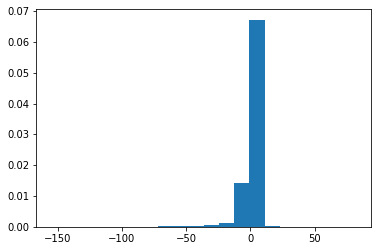

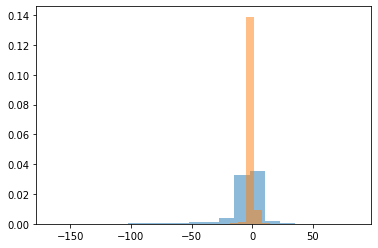

In [81]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.testset_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.testset_toanalyze_lossimprovement))
plt.hist(interaction_analysis.testset_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.testset_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()